In [4]:
import pandas as pd

# Чтение файла с предположением, что разделителем является пробел
dataset = pd.read_csv('SouthGermanCredit.asc', delim_whitespace=True)

# Просмотр первых нескольких строк датасета
dataset.head()


/tmp/ipykernel_13412/3174926840.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv('SouthGermanCredit.asc', delim_whitespace=True)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


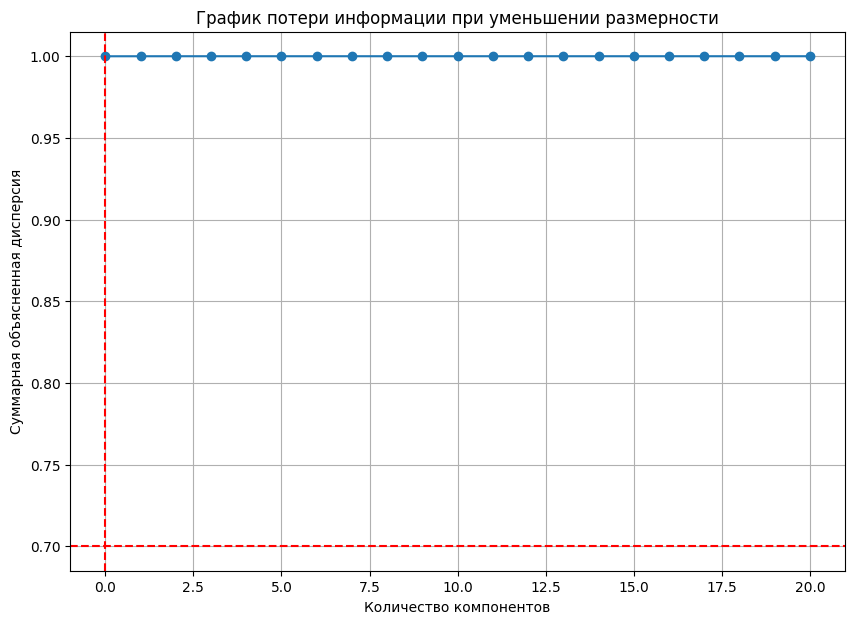

(1, 0.9999701631637874)

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming dataset is already centered around 0. If not, we would need to scale it.
pca = PCA().fit(dataset)

# Cumulative sum of variance explained with [n] features
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine how many features are needed to explain at least 70% of the variance (i.e., lose no more than 30%)
components_needed = np.argmax(explained_variance >= 0.70) + 1

# Plotting the cumulative sum of explained variance
plt.figure(figsize=(10, 7))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--')
plt.axvline(x=components_needed - 1, color='r', linestyle='--')
plt.title('График потери информации при уменьшении размерности')
plt.xlabel('Количество компонентов')
plt.ylabel('Суммарная объясненная дисперсия')
plt.grid(True)
plt.show()

components_needed, explained_variance[components_needed - 1]


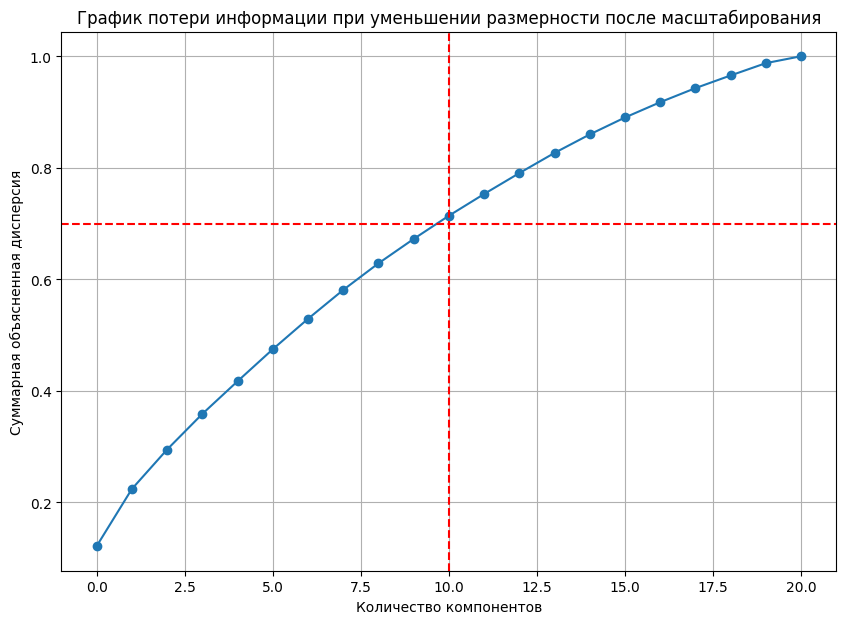

(11, 0.7140344205783353)

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features before applying PCA
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

# Perform PCA on the scaled data
pca_scaled = PCA().fit(dataset_scaled)

# Cumulative sum of variance explained with [n] features for the scaled data
explained_variance_scaled = np.cumsum(pca_scaled.explained_variance_ratio_)

# Determine how many features are needed to explain at least 70% of the variance for the scaled data
components_needed_scaled = np.argmax(explained_variance_scaled >= 0.70) + 1

# Plotting the cumulative sum of explained variance for the scaled data
plt.figure(figsize=(10, 7))
plt.plot(explained_variance_scaled, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--')
plt.axvline(x=components_needed_scaled - 1, color='r', linestyle='--')
plt.title('График потери информации при уменьшении размерности после масштабирования')
plt.xlabel('Количество компонентов')
plt.ylabel('Суммарная объясненная дисперсия')
plt.grid(True)
plt.show()

components_needed_scaled, explained_variance_scaled[components_needed_scaled - 1]
